In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from extract import extract
from transform import transform
from load import load

extract()
transform()
load()

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import TARGET_PATH
from config import FOLDER_NAME
from load import GROUPED_OWID_FILE_NAME

OWID_COLUMNS = [
    'location',
    'gdp_per_capita','extreme_poverty','life_expectancy',
    'human_development_index','population','population_density',

    'new_cases_smoothed_per_million','new_deaths_smoothed_per_million',
    'icu_patients_per_million','hosp_patients_per_million',

    'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million',
    'stringency_index','median_age','excess_mortality'

]

file_path = os.path.join(TARGET_PATH, FOLDER_NAME, GROUPED_OWID_FILE_NAME)
df = pd.read_csv(file_path)
df = df[OWID_COLUMNS].fillna(0)
df = df.reset_index()
df

,index,location,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,population,population_density,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,icu_patients_per_million,hosp_patients_per_million,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,median_age,excess_mortality
0,0,Albania,11803.431,1.1,78.57,0.795,2.872934e+06,104.871,191.456143,1.758000,0.000000,0.0,31.936250,2336.615385,45.783333,38.0,0.0
1,1,Algeria,13913.839,0.5,76.88,0.748,4.461663e+07,17.348,2.502286,0.106286,0.413769,0.0,11.015000,267.444444,0.000000,29.1,0.0
2,2,Argentina,18933.907,0.6,76.67,0.845,4.560582e+07,16.177,27.080786,0.440714,0.000000,0.0,59.292727,5548.153846,42.590000,31.9,0.0
3,3,Armenia,8787.580,1.8,75.09,0.776,2.968128e+06,102.931,476.566571,16.295571,0.000000,0.0,9.380000,2364.200000,0.000000,35.7,0.0
4,4,Australia,44648.710,0.5,83.44,0.944,2.578822e+07,3.202,51.548143,0.398429,0.000000,0.0,68.585714,5594.928571,60.650000,37.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,Vietnam,6171.884,2.0,75.40,0.704,9.816883e+07,308.127,79.445857,0.754143,0.000000,0.0,34.376000,13128.076923,0.000000,32.6,0.0
120,120,World,15469.207,10.0,72.58,0.737,7.874966e+09,58.045,61.123714,0.908000,0.000000,0.0,40.449286,3941.928571,0.000000,30.9,0.0
121,121,Yemen,1479.147,18.8,66.12,0.470,3.049064e+07,53.508,0.310500,0.085143,0.000000,0.0,1.140000,449.153846,23.150000,20.3,0.0
122,122,Zambia,3689.251,57.5,63.89,0.584,1.892066e+07,22.995,0.929857,0.016786,0.000000,0.0,3.200000,265.642857,44.440000,17.7,0.0


In [15]:
rename_map = {
    'location': 'Lokacija',
    'gdp_per_capita': 'BDP po stanovniku',
    'extreme_poverty': 'Ekstremno siromaštvo',
    'life_expectancy': 'Životno očekivanje',
    'human_development_index': 'Index razvitka',
    'population': 'Populacija',
    'population_density': 'Gustoća populacije',
    'new_cases_smoothed_per_million': 'Novi slučajevi (zaglađeno) po 1M',
    'new_deaths_smoothed_per_million': 'Nove smrti (zaglađeno) po 1M',
    'icu_patients_per_million': 'ICU po 1M',
    'hosp_patients_per_million': 'Bolnica po 1M',
    'people_fully_vaccinated_per_hundred': 'Cijepljeni (2 doze) po 1M',
    'new_vaccinations_smoothed_per_million': 'Novocijepljenih po 1M',
    'stringency_index': 'Index ograničenja',
    'median_age': 'Srednja životna dob',
    'excess_mortality': 'Prekomjerna smrtnost',
}

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location                               124 non-null    object 
 1   gdp_per_capita                         124 non-null    float64
 2   extreme_poverty                        124 non-null    float64
 3   life_expectancy                        124 non-null    float64
 4   human_development_index                124 non-null    float64
 5   population                             124 non-null    float64
 6   population_density                     124 non-null    float64
 7   new_cases_smoothed_per_million         124 non-null    float64
 8   new_deaths_smoothed_per_million        124 non-null    float64
 9   icu_patients_per_million               124 non-null    float64
 10  hosp_patients_per_million              124 non-null    float64
 11  people

<AxesSubplot:ylabel='location'>

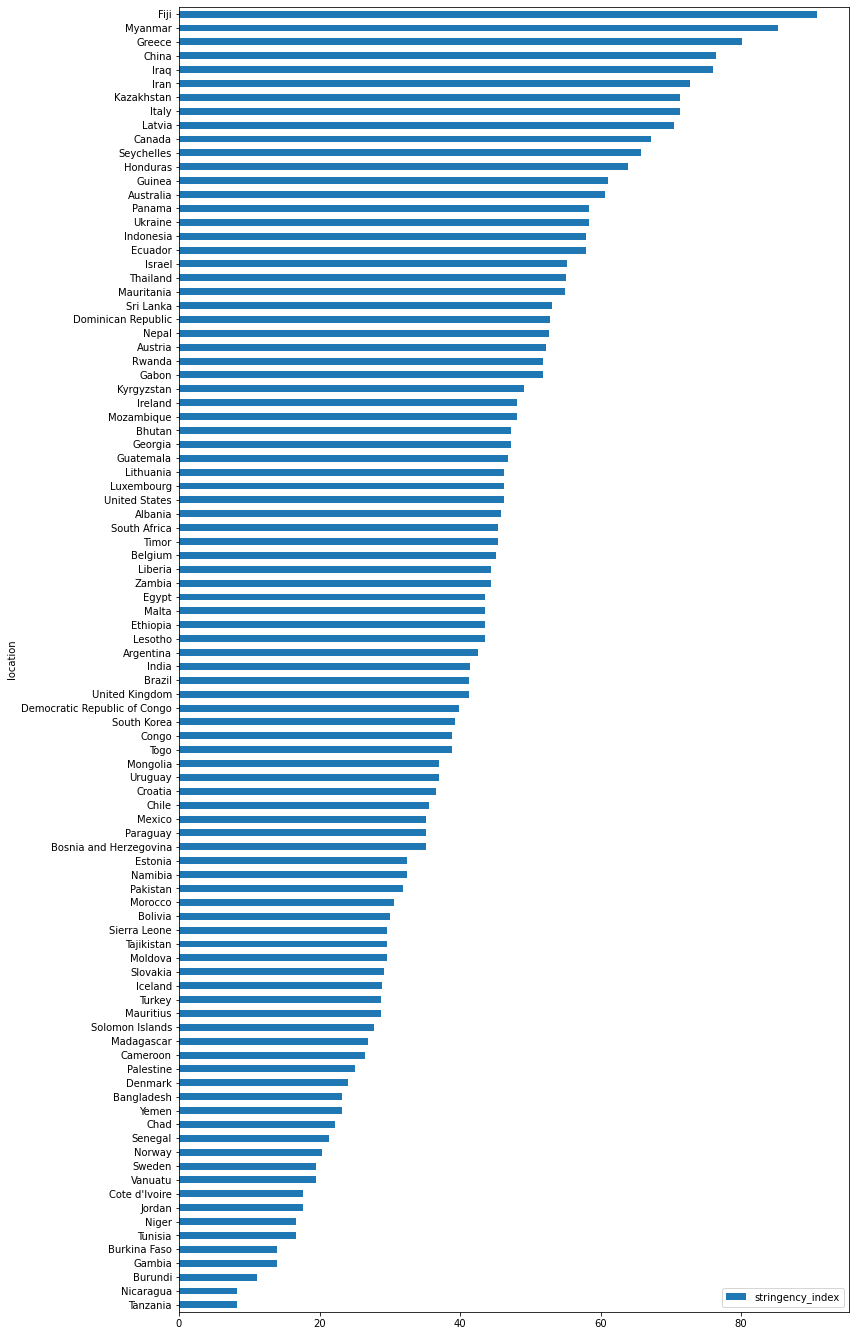

In [35]:
fig, ax = plt.subplots(1, figsize=(12, 24))
stringency_df = df[['location', 'stringency_index']].sort_values('stringency_index')
stringency_df = stringency_df[stringency_df['stringency_index'] > 0]
stringency_df.plot.barh(x='location', y='stringency_index', ax=ax)

<AxesSubplot:ylabel='location'>

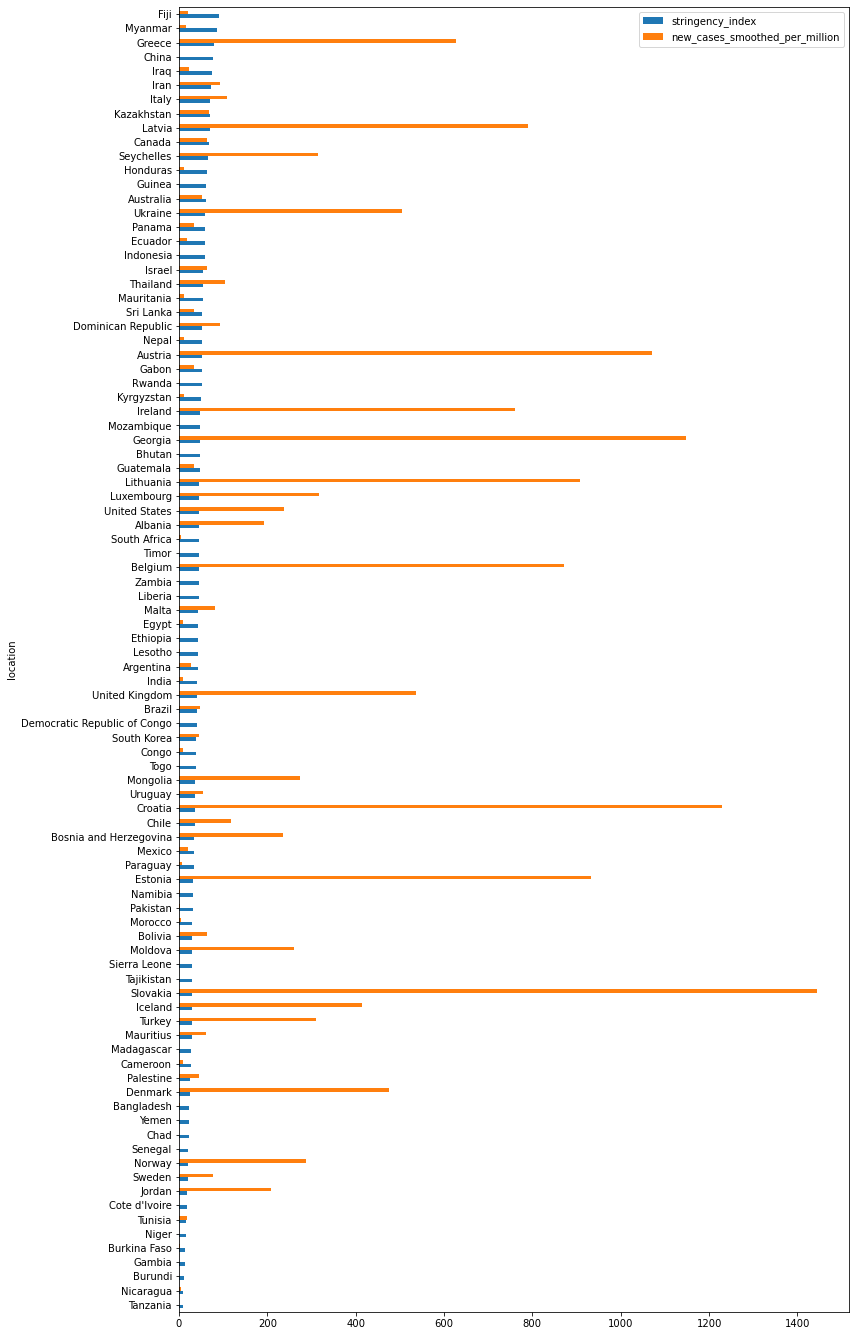

In [38]:
compare = ['stringency_index', 'new_cases_smoothed_per_million']
fig, ax = plt.subplots(1, figsize=(12, 24))
custom_df = df.sort_values(compare)

for col in compare:
    custom_df = custom_df[custom_df[col] > 0]
custom_df.plot.barh(x='location', y=compare, ax=ax)